In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

%matplotlib inline


# 1. code number            id number
# 2. Clump Thickness               1 - 10
# 3. Uniformity of Cell Size       1 - 10
# 4. Uniformity of Cell Shape      1 - 10
# 5. Marginal Adhesion             1 - 10
# 6. Single Epithelial Cell Size   1 - 10
# 7. Bare Nuclei                   1 - 10
# 8. Bland Chromatin               1 - 10
# 9. Normal Nucleoli               1 - 10
# 10. Mitoses                       1 - 10
# 11. Class:   2 for benign, 4 for cancer


breast_cancer = pd.read_csv('breast_cancer.txt', header = None, 
names = ['code','clump_thickness', 'unif_cell_size','unif_cell_shape', 'adhesion', 'epi_cell_size','bn','bc','nn','mit','class'])

In [35]:
breast_cancer['class'].value_counts()
#Not so imbalnced

2    458
4    241
Name: class, dtype: int64

In [ ]:
breast_cancer[['clump_thickness', 'unif_cell_size','unif_cell_shape', 'adhesion', 'epi_cell_size','bc','nn','mit']]

In [36]:
breast_cancer.head()

,code,clump_thickness,unif_cell_size,unif_cell_shape,adhesion,epi_cell_size,bn,bc,nn,mit,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [86]:
int(False)

0

In [50]:
jittered_values = []

for index in list(range(len(breast_cancer))):
    jittered_values.append( breast_cancer['class'][index]+ np.random.uniform(0, 1.5))

In [51]:
breast_cancer['jitter_class'] = jittered_values

Text(0.5, 1.0, 'Mitosis above >=3 looks like a strong cancer indicator')

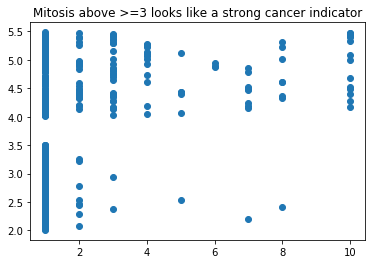

In [90]:
#for feature in list(breast_cancer.keys()):

plt.plot(breast_cancer['mit'], breast_cancer['jitter_class'], 'o')
plt.title('Mitosis above >=3 looks like a strong cancer indicator')

#mit_bi = []
#for index in list(range(len(breast_cancer))):
#    mit_bi.append(int(breast_cancer['mit'][index]>=3))

Text(0.5, 1.0, 'Clump Thickness above >=7 looks like a strong cancer indicator')

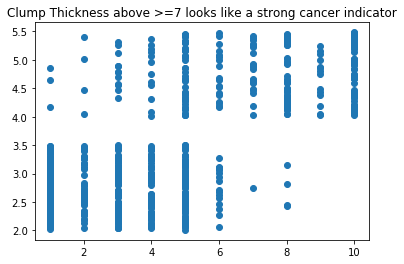

In [89]:
plt.plot(breast_cancer['clump_thickness'], breast_cancer['jitter_class'], 'o')
plt.title('Clump Thickness above >=7 looks like a strong cancer indicator')


Text(0.5, 1.0, 'Uniform Cell Size >=5 looks like a strong cancer indicator')

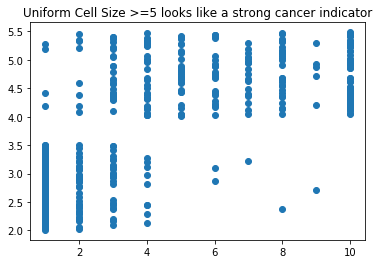

In [61]:
plt.plot(breast_cancer['unif_cell_size'], breast_cancer['jitter_class'], 'o')
plt.title('Uniform Cell Size >=5 looks like a strong cancer indicator')

Text(0.5, 1.0, 'Uniform Cell Size >= 5 looks like a strong cancer indicator')

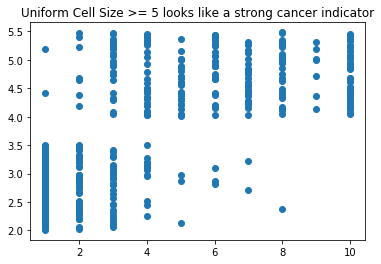

In [62]:
plt.plot(breast_cancer['unif_cell_shape'], breast_cancer['jitter_class'], 'o')
plt.title('Uniform Cell Size >= 5 looks like a strong cancer indicator')

Text(0.5, 1.0, 'Adhesion >= 4 looks like a strong cancer indicator')

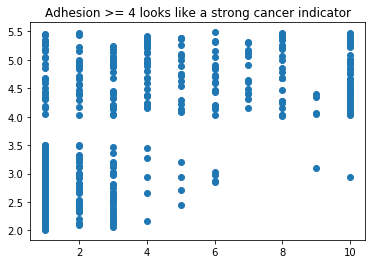

In [64]:
plt.plot(breast_cancer['adhesion'], breast_cancer['jitter_class'], 'o')
plt.title('Adhesion >= 4 looks like a strong cancer indicator')

Text(0.5, 1.0, 'epi_cell_size >= 5 looks like a strong cancer indicator')

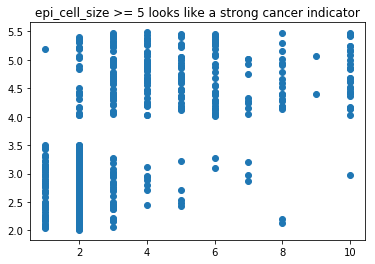

In [66]:
plt.plot(breast_cancer['epi_cell_size'], breast_cancer['jitter_class'], 'o')
plt.title('epi_cell_size >= 5 looks like a strong cancer indicator')

Text(0.5, 1.0, 'bc >= 4 looks like a strong cancer indicator')

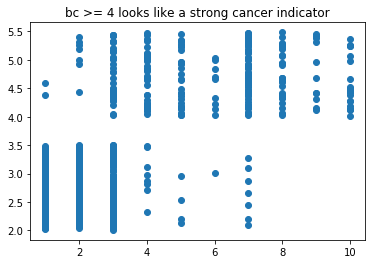

In [69]:
plt.plot(breast_cancer['bc'], breast_cancer['jitter_class'], 'o')
plt.title('bc >= 4 looks like a strong cancer indicator')

Text(0.5, 1.0, 'nn >= 4 looks like a strong cancer indicator')

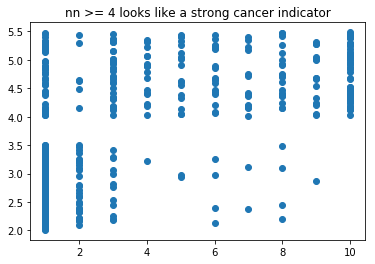

In [71]:
plt.plot(breast_cancer['nn'], breast_cancer['jitter_class'], 'o')
plt.title('nn >= 4 looks like a strong cancer indicator')

In [79]:
natural_labels = []

for index in list(range(len(breast_cancer))):
    natural_labels.append(int((breast_cancer['class'][index]-2)/2))
    
breast_cancer['target'] = natural_labels


In [180]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

X = breast_cancer[['clump_thickness', 'unif_cell_size','unif_cell_shape', 'adhesion', 'epi_cell_size','bc','nn','mit']]
Y = breast_cancer['target']

clf = tree.DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_split=6, min_samples_leaf=5)
#clf = clf.fit(X, Y)

In [181]:
scores = cross_val_score(clf, X, Y, cv=8)
print(scores)

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


[0.88764045 0.92045455 0.91954023 0.93103448 0.94252874 0.97701149
 0.96551724 0.97701149]
Accuracy: 0.94 (+/- 0.06)


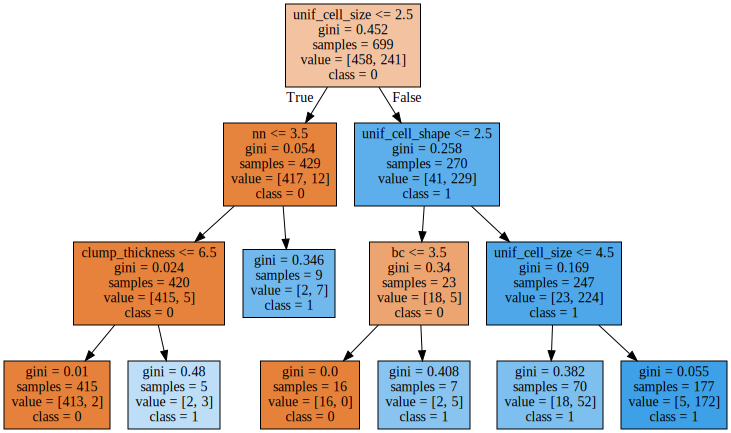

In [183]:
from sklearn.tree import export_graphviz
from IPython.display import SVG
from graphviz import Source
from IPython.display import display


clf = tree.DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_split=6, min_samples_leaf=5)
clf = clf.fit(X, Y)

labels = X.keys()

graph = Source(tree.export_graphviz(clf, out_file=None
   , feature_names=labels, class_names=['0', '1'] 
   , filled = True))
display(SVG(graph.pipe(format='svg')))